# Observations and Insights

# Inferences
# 1. Looking at the stats, Ramicane and Capomulin were most effective in reducing the tumor size with the mean tumpor size being 40.2 and 40.6, respectively.
# 2. The boxplot of the four drugs identified an outlier for the Infubinol and still supported Ramicane and Capomulin as being the top performing drug.
# 3. Although the line and scatter plots show a downward trend in weight of the mice on Capomulin, the regression analysis shows that there is some correlation.  However, the correlation is not statistically significant at .084.  Overall, we can note the the weight of the mouse decreases with the success of the drug reducing the size of the tumor.







In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Downloads/Mouse_metadata.csv"
study_results_path = "Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
duplicate_mice=combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [15]:
duplicate=combined_df.loc[combined_df["Mouse ID"]=="g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
tumor_start=clean_df.groupby("Mouse ID").first()["Tumor Volume (mm3)"]
tumor_start=tumor_start.to_frame()
tumor_start["last"]=clean_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
tumor_start["difference"]=tumor_start["Tumor Volume (mm3)"]-tumor_start["last"]
tumor_start

,Tumor Volume (mm3),last,difference
Mouse ID,,,
a203,45.0,67.973419,-22.973419
a251,45.0,65.525743,-20.525743
a262,45.0,70.717621,-25.717621
a275,45.0,62.999356,-17.999356
a366,45.0,63.440686,-18.440686
...,...,...,...
z435,45.0,48.710661,-3.710661
z578,45.0,30.638696,14.361304
z581,45.0,62.754451,-17.754451


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [80]:
# Checking the number of mice in the clean DataFrame.
total_mouse = len(clean_df["Mouse ID"].value_counts())
mouse_count = pd.DataFrame({"Total Mice":[total_mouse]})

# Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summarystats = pd.DataFrame(clean_df.groupby("Drug Regimen").count())

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summarystats["Mean"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary dataframe.
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})
summarystats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [32]:
stats=clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","std","var","sem"]})
stats

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

# Bar and Pie Charts

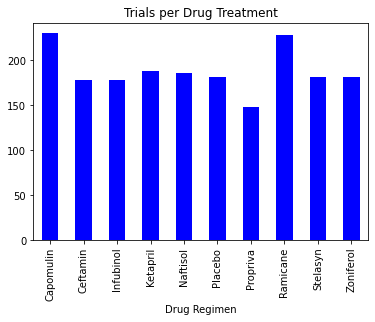

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapoints = summarystats[["Trials"]]
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)
plt.title("Trials per Drug Treatment")
plt.show()
plt.tight_layout()

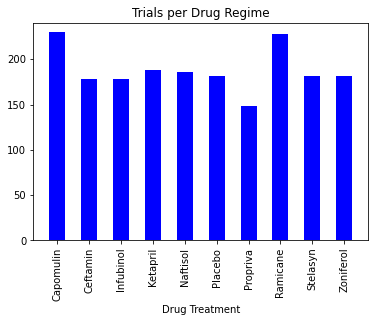

In [41]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Treatment")
plt.show()

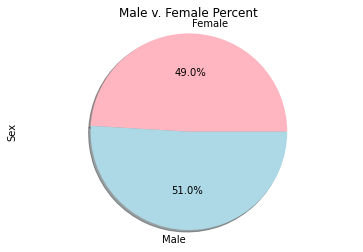

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = clean_df.groupby('Sex')
gender_mouse_count = pd.DataFrame(gender_count['Sex'].count())
gender_mouse_count.head()

gender_mouse_count.plot(kind="pie", y='Sex', autopct="%1.1f%%", colors = ["lightpink", "lightblue"], shadow=True, legend=False)

plt.axis("equal")
plt.title("Male v. Female Percent")
plt.show()

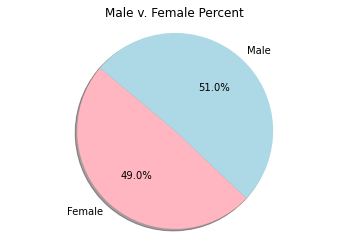

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = list(gender_mouse_count.index.values)
gender_count = gender_mouse_count['Sex']
colors = ["lightpink", "lightblue"]

plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Male v. Female Percent")
plt.show() 


# Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drug_df = clean_df.loc[(clean_df["Drug Regimen"].isin(drugs))]
drug_df

tumor_vol=drug_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
drug_reg=drug_df.groupby("Mouse ID").last()["Drug Regimen"]
quart_df=pd.DataFrame({"Tumor Volume":tumor_vol,"Drug Regimen":drug_reg})
quart_df

,Tumor Volume,Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a275,62.999356,Ceftamin
a411,38.407618,Ramicane
a444,43.047543,Ramicane
...,...,...
y769,68.594745,Ceftamin
y793,31.896238,Capomulin
y865,64.729837,Ceftamin


<AxesSubplot:title={'center':'Tumor Volume'}, xlabel='Drug Regimen'>

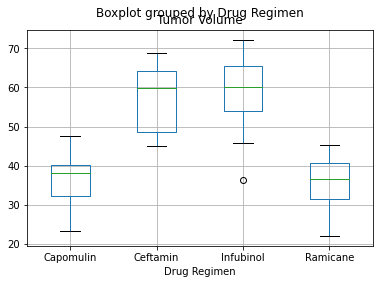

In [27]:
quart_df.boxplot(by="Drug Regimen", column="Tumor Volume")

In [29]:
# Put treatments into a list for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in drugs:
    filter_df=quart_df.loc[quart_df["Drug Regimen"]==drug]
    tumor_v=filter_df["Tumor Volume"]
    
    quartiles = tumor_v.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_df = filter_df.loc[(filter_df['Tumor Volume'] > upper_bound) | (filter_df['Tumor Volume'] < lower_bound), :]
    outliers_df
    
    print (outliers_df)

Empty DataFrame
Columns: [Tumor Volume, Drug Regimen]
Index: []
Empty DataFrame
Columns: [Tumor Volume, Drug Regimen]
Index: []
          Tumor Volume Drug Regimen
Mouse ID                           
c326         36.321346    Infubinol
Empty DataFrame
Columns: [Tumor Volume, Drug Regimen]
Index: []


# Line and Scatter Plots

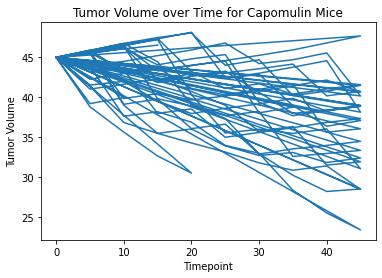

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),:]
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]
tumor_volume_line, = plt.plot(timepoint, tumor_volume)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()


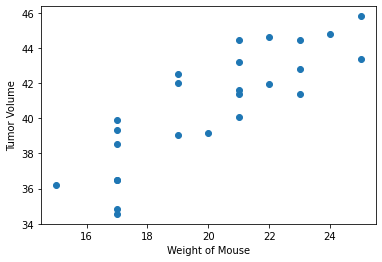

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


# Correlation and Regression

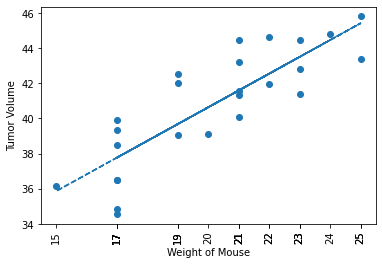

The correlation between weight and tumor value is 0.84


In [48]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')